In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("train.csv")

In [2]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [3]:
df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [4]:
df.shape

(14999, 9)

In [5]:
import matplotlib.cm as cm

In [6]:
## Removing character "F" present in DATA"
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']


In [7]:
df.shape

(14637, 9)

In [8]:
df["category"]

0        F
1        D
2        C
3        H
4        D
        ..
14994    A
14995    D
14996    B
14997    G
14998    D
Name: category, Length: 14637, dtype: object

In [9]:
### Converts values to integers for views , likes , comments, dilikes, and adview

df['views']=pd.to_numeric(df['views'])
df['comment']=pd.to_numeric(df['comment'])
df['likes']=pd.to_numeric(df['likes'])
df['dislikes']=pd.to_numeric(df['dislikes'])
df['adview']=pd.to_numeric(df['adview'])


In [10]:
column_vidid=df['vidid']
column_vidid

0        VID_18655
1        VID_14135
2         VID_2187
3        VID_23096
4        VID_10175
           ...    
14994       VID_31
14995     VID_5861
14996      VID_805
14997    VID_19843
14998     VID_8534
Name: vidid, Length: 14637, dtype: object

In [11]:
# Encoding features like category, Duration , Vidid,published
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['category']=label_encoder.fit_transform(df['category'])
df['duration']=label_encoder.fit_transform(df['duration'])
df['vidid']=label_encoder.fit_transform(df['vidid'])
df['published']=label_encoder.fit_transform(df['published'])
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,5
1,2741,2,1707,56,2,6,2185,3040,3
2,8138,1,2023,25,0,2,2094,1863,2
3,9005,6,620860,777,161,153,2119,2546,7
4,122,1,666,1,0,0,2091,1963,3


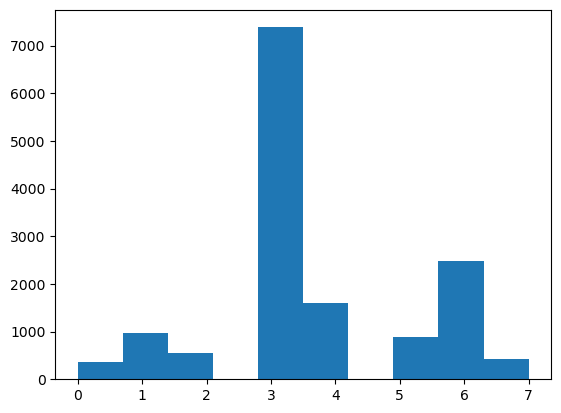

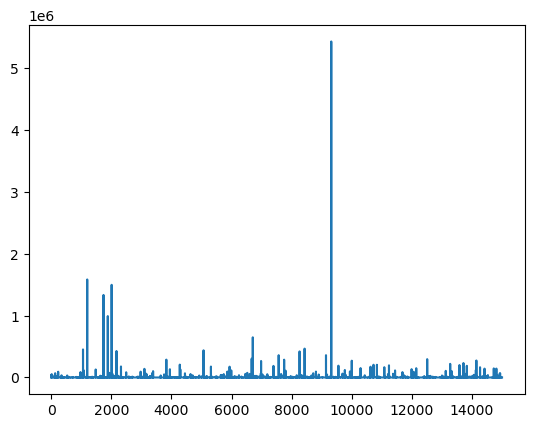

In [12]:
# Visualization

# Individual plots

plt.hist(df['category'])
plt.show()

plt.plot(df['adview'])
plt.show()

df=df[df['adview']<2000000]

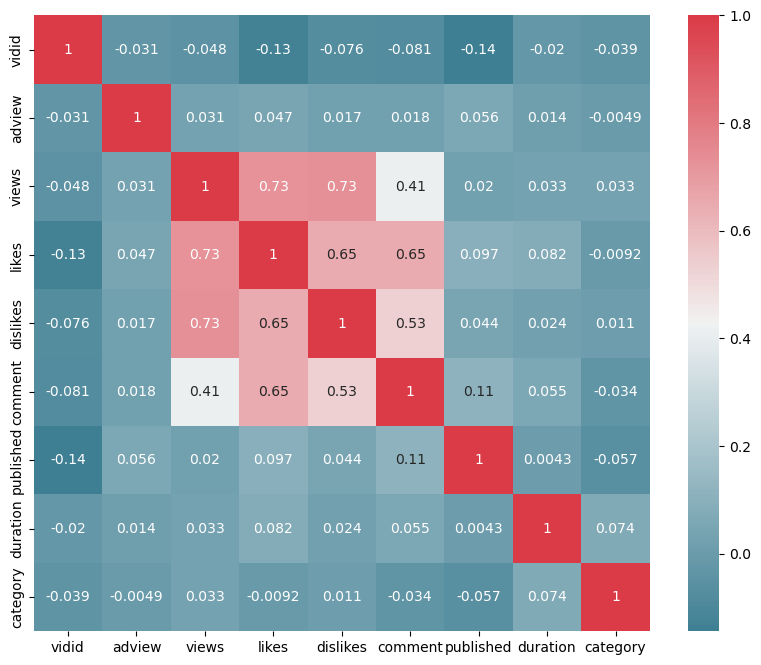

In [13]:
# Heatmap

f,ax=plt.subplots(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()



In [14]:
# Convert Time in_sec for duration

import datetime
import time


def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=='M'):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00'
    if(s==''):
        s=='00'
    bp=h+':'+m+':'+s
    return bp


train=pd.read_csv("train.csv")['duration']
time=train.apply(checki)

def func_sec(time_sharing):
    try:
        h, m, s = time_sharing.split(':')
        return int(h) * 3600 + int(m) * 60 + int(s)
    except (ValueError, AttributeError):
        return 0


time1=time.apply(func_sec)

df['duration']=time1
df.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,5
1,2741,2,1707,56,2,6,2185,570,3
2,8138,1,2023,25,0,2,2094,136,2
3,9005,6,620860,777,161,153,2119,262,7
4,122,1,666,1,0,0,2091,31,3


## Split Data 

In [15]:
## Divide dependent(target) and independent features
X=pd.DataFrame(data=df.iloc[:,2:])
y=pd.DataFrame(data=df.iloc[:,1].values,columns=['target'])

In [16]:
X.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,5
1,1707,56,2,6,2185,570,3
2,2023,25,0,2,2094,136,2
3,620860,777,161,153,2119,262,7
4,666,1,0,0,2091,31,3


In [17]:
y

,target
0,40
1,2
2,1
3,6
4,1
...,...
14631,2
14632,1
14633,4
14634,1


In [18]:
## Split the data(80%:20%)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape

(11708, 7)

In [20]:
X_train.head()

,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,1217,0,3
9523,1419766,887,362,232,1547,5811,6
3012,26086,19,0,9,966,178,5
1888,305445,3662,45,555,1484,257,6
11378,737649,1702,96,53,1127,895,3


## Normalise the Data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [22]:
X_train

array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
        5.10700797e-01, 0.00000000e+00, 4.28571429e-01],
       [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
        6.49181704e-01, 1.37320699e-01, 8.57142857e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 0.00000000e+00, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 8.36543233e-03, 4.28571429e-01]])

In [23]:
X_train.mean()

0.17384916330521913

## Evalution Metrics

In [24]:
from sklearn.metrics import f1_score
from sklearn import metrics

def print_error(X_test,y_test,model_name):
    prediction=model_name.predict(X_test)
    print('Mean Abosolute Error:',metrics.mean_absolute_error(y_test,prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

## Linear Regression

In [25]:

from sklearn import linear_model
linear_reg=linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)
print_error(X_test,y_test,linear_reg)

Mean Abosolute Error: 3709.2233098173524
Mean Squared Error: 835687006.6883751
Root Mean Squared Error: 28908.25153288201


## Decision_tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)

Mean Abosolute Error: 2823.85587431694
Mean Squared Error: 889443144.1284153
Root Mean Squared Error: 29823.53339442554


## Support Vector Regressor

In [27]:
from sklearn.svm import SVR
svr_reg=SVR()
svr_reg.fit(X_train,y_train)
print_error(X_test,y_test,svr_reg)


C:\Users\KIIT\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Abosolute Error: 1696.9448694164319
Mean Squared Error: 833685785.6379396
Root Mean Squared Error: 28873.617467126274


## Random Forest Regressor



In [28]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators=200,max_depth=25,min_samples_split=15,min_samples_leaf=2)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23540\779770597.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Abosolute Error: 3416.6262930937637
Mean Squared Error: 716146539.4403696
Root Mean Squared Error: 26760.914398435074


# Artificial Neural Network


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential([
    Dense(6, activation="relu", input_shape=X_train.shape[1:]),
    Dense(6, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.mean_squared_error

ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 767407168.0000 - mean_squared_error: 767407168.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767402944.0000 - mean_squared_error: 767402944.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767398208.0000 - mean_squared_error: 767398208.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767392128.0000 - mean_squared_error: 767392128.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767384448.0000 - mean_squared_error: 767384448.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767374016.0000 - mean_squared_error: 767374016.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767362304.0000 - mean_squared_error: 767362304.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767347904.0000 - mean_squared_error:

366/366 [==============================] - 1s 2ms/step - loss: 764532928.0000 - mean_squared_error: 764532928.0000
Epoch 66/100
366/366 [==============================] - 1s 2ms/step - loss: 764494848.0000 - mean_squared_error: 764494848.0000
Epoch 67/100
366/366 [==============================] - 1s 3ms/step - loss: 764458624.0000 - mean_squared_error: 764458624.0000
Epoch 68/100
366/366 [==============================] - 1s 2ms/step - loss: 764423360.0000 - mean_squared_error: 764423360.0000
Epoch 69/100
366/366 [==============================] - 1s 2ms/step - loss: 764389888.0000 - mean_squared_error: 764389888.0000
Epoch 70/100
366/366 [==============================] - 1s 2ms/step - loss: 764357888.0000 - mean_squared_error: 764357888.0000
Epoch 71/100
366/366 [==============================] - 1s 2ms/step - loss: 764325952.0000 - mean_squared_error: 764325952.0000
Epoch 72/100
366/366 [==============================] - 1s 2ms/step - loss: 764295936.0000 - mean_squared_error: 7642

## Saving Scikitlearn models

In [30]:
import joblib
joblib.dump(svr_reg, "support_vector_youtubeadview.pkl")

['support_vector_youtubeadview.pkl']

## Saving Keras Artificial Neural Network model

In [31]:
ann.save("ann_youtubeadview.h5")

C:\Users\KIIT\anaconda3\envs\ml\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:

from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Create and train an SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate Weighted Average F1 Score
f1_weighted_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("Weighted Average F1 Score (SVM):", f1_weighted_svm)


C:\Users\KIIT\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Weighted Average F1 Score (SVM): 0.2479046247525859


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Create and train a Decision Tree model
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree_classifier.predict(X_test)

# Calculate Weighted Average F1 Score
f1_weighted_tree = f1_score(y_test, y_pred_tree, average='weighted')
print("Weighted Average F1 Score (Decision Tree):", f1_weighted_tree)


Weighted Average F1 Score (Decision Tree): 0.2450601858011052


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create and train a Random Forest model
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_classifier.predict(X_test)

# Calculate Weighted Average F1 Score
f1_weighted_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Weighted Average F1 Score (Random Forest):", f1_weighted_rf)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_23540\589138821.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_classifier.fit(X_train, y_train)


Weighted Average F1 Score (Random Forest): 0.2901778516496644
